# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
362369,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0098,0.0610,0.0928,0.0415,0,0,0,0
284565,0.5664,0.2808,0.6836,0.0415,0.0439,0.0684,0.8838,0.6201,0.2100,0.2417,2,2,5,5
19248,0.0024,0.0024,0.0293,0.0024,0.0024,0.0024,0.0049,0.0659,0.0269,0.0098,3,3,3,3
149357,0.5444,0.2686,0.0122,0.0049,0.0024,0.0293,0.2881,0.1782,0.1270,0.1440,8,8,6,6
26363,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.0610,0.0024,0.0049,2,0,4,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# MinMaxScaler

In [12]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler=MinMaxScaler()

In [13]:
sc = pd.DataFrame(MinMaxScaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,0.014154,0.000515,0.0,0.000515,0.0,0.006602,0.0,0.009950,0.000515,0.007520
1,0.012052,0.000515,0.0,0.000515,0.0,0.003301,0.0,0.008385,0.000515,0.006361
2,0.011537,0.000515,0.0,0.000515,0.0,0.003301,0.0,0.007870,0.000515,0.005203
3,0.011537,0.000515,0.0,0.000515,0.0,0.003301,0.0,0.006819,0.000515,0.003476
4,0.009950,0.000515,0.0,0.000515,0.0,0.001617,0.0,0.007334,0.000515,0.002885
...,...,...,...,...,...,...,...,...,...,...
378530,0.000000,0.000515,0.0,0.000515,0.0,0.001617,0.0,0.011537,0.026198,0.000000
378531,0.000000,0.000515,0.0,0.000515,0.0,0.003301,0.0,0.010487,0.027250,0.000000
378532,0.000000,0.000515,0.0,0.000515,0.0,0.001617,0.0,0.010487,0.027250,0.000000
378533,0.000000,0.000515,0.0,0.000515,0.0,0.001617,0.0,0.009950,0.027765,0.000000


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))



e = Dense(64, activation='softmax')(visible)



output = Dense(num_classes, activation='softmax')(e)




model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 24)                1560      
                                                                 
Total params: 2,264
Trainable params: 2,264
Non-trainable params: 0
_________________________________________________________________


# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=10, epochs=1, validation_data = (X_test, y_test))

30283/30283 [==============================] - 232s 8ms/step - loss: 1.7346 - accuracy: 0.5515 - val_loss: 1.5820 - val_accuracy: 0.5711


# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

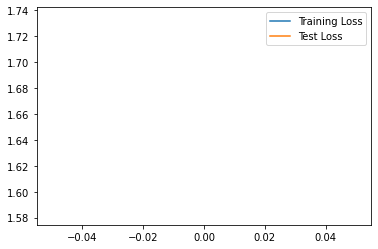

In [27]:
#Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = "Test Loss")
plt.legend()
plt.show()

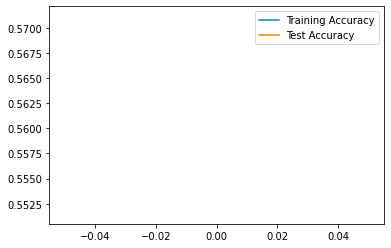

In [26]:
#accuracy Curve
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = "Test Accuracy")
plt.legend()
plt.show()

## 4.2 Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

##  4.3 Make Predictions

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

# Tune the Number of Neurons in the Hidden Layer

In [20]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

In [21]:
def define_model(neurons=28):   
    model = Sequential()
    
    
    model.add(Dense(28, activation='relu', kernel_initializer='he_uniform', input_dim = input_dim))
    model.add(Dense(neurons, activation='relu'))
    
   



   
    model.add(Dense(num_classes, activation='softmax'))
    
    
    
    
    
    # compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',      
                  metrics=['acc'])
    return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=define_model, 
                        verbose=1)


neurons = [28, 32, 64, 76]

param_grid = dict(neurons=neurons, batch_size=[10], 
                  epochs=[5])


grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=3)

grid_result = grid.fit(X, y)

C:\Users\nafem\AppData\Local\Temp\ipykernel_8540\1793639966.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=define_model,


Epoch 1/5
25236/25236 [==============================] - 63s 2ms/step - loss: 1.1182 - acc: 0.6939
Epoch 2/5
25236/25236 [==============================] - 55s 2ms/step - loss: 0.8950 - acc: 0.7479
Epoch 3/5
25236/25236 [==============================] - 55s 2ms/step - loss: 0.8250 - acc: 0.7650
Epoch 4/5
25236/25236 [==============================] - 52s 2ms/step - loss: 0.7830 - acc: 0.7742
Epoch 5/5
12618/12618 [==============================] - 21s 2ms/step - loss: 4.0371 - acc: 0.5195
Epoch 1/5
25236/25236 [==============================] - 55s 2ms/step - loss: 1.0601 - acc: 0.7144
Epoch 2/5
25236/25236 [==============================] - 55s 2ms/step - loss: 0.8033 - acc: 0.7746
Epoch 3/5
25236/25236 [==============================] - 55s 2ms/step - loss: 0.7397 - acc: 0.7901
Epoch 4/5
25236/25236 [==============================] - 55s 2ms/step - loss: 0.7062 - acc: 0.7980
Epoch 5/5
12618/12618 [==============================] - 21s 2ms/step - loss: 6.2234 - acc: 0.5372
Epoch 1/5


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean = %f (std=%f) with: %r" % (mean, stdev, param))